# <center>Prediction using Supervised ML </center>

<img src= "https://1.bp.blogspot.com/-TDOfd1E89Iw/WVokdR62gAI/AAAAAAAAFkE/bcz1FXNQiwImMIrr0NGLt3wMnUQoCOTAQCLcBGAs/s640/Supervised%2BML.gif"> 

__The task is to predict the percentage of a student based on the number of hours he studied.__

__This is a simple LINEAR REGRESSION MODEL with just two variables__ 
_i.e Hours and Scores_

__PROBLEM STATEMENT :__ ___What will be predicted score if a student studies for 9.25 hrs/ day?___

### We first begin by installing all the required libraries to build our model.

In [1]:
#installing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Next, import the data in CSV format and have a look at the data.

In [2]:
# importing the data
url = ("http://bit.ly/w-data")
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Let's understand our data

In [3]:
data.shape

(25, 2)

In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Next, we'll plot a graph of Number of hours a student studied vs the percentage he scored. 
_This will help us to have a clear idea about the relationship and corelation between the variables_

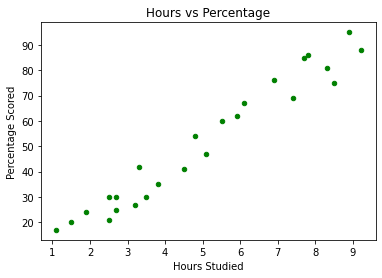

In [7]:
# plotting a graph to find the relationship between variables
data.plot(kind = 'scatter', x = 'Hours', y = 'Scores', color = 'green')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

### As we can see from the above graph, the variables have a linear and positive relationship with each other.

__In other words, the percentage of a student increases with the number of hours he studied.__

## Preparing the data to build the Regression Model

In [8]:
x = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1)

### We divide the data into training and testing data. Here I've divided it into 70-30 ratio.
_i.e 70% data for training and 30% data for testing_

In [9]:
# Splitting data into Train and Test datasets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
print(Xtrain)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [11]:
print(Xtest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [12]:
#build linear regression model
lr = LinearRegression()
model = lr.fit(Xtrain,Ytrain)
model

LinearRegression()

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Now, let's calculate the coefficient and intercept values in order to get the Linear Regression equation.

In [14]:
#printing the coefficient and intercept
print("the coefficient is:", model.coef_)
print("the intercept is:", model.intercept_)

the coefficient is: [[9.78856669]]
the intercept is: [2.37081538]


In [15]:
model.score(x,y)

0.9529426789332803

In [16]:
print("Linear Regression equation is: y = {:.4}+ {:.2}x".format(model.intercept_[0], model.coef_[0][0]))

Linear Regression equation is: y = 2.371+ 9.8x


In [20]:
predict = lr.predict(Xtest)

### Our linear regression quation is :  y = 2.371 + 9.8 x

#### Let's plot the test data 


Text(0.5, 1.0, 'Test Dataset')

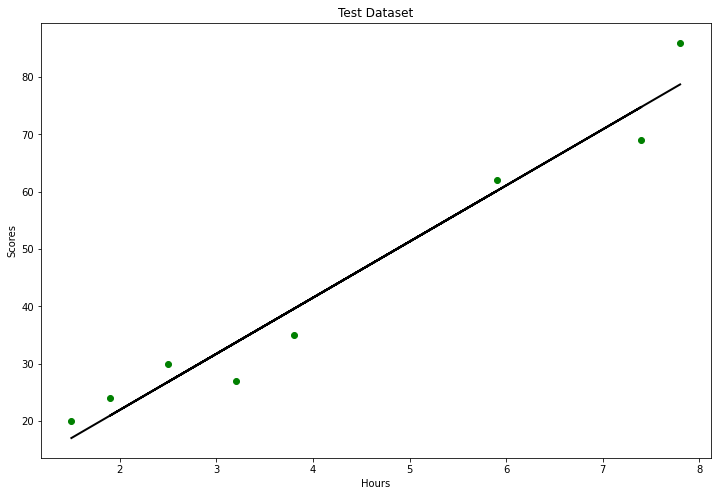

In [21]:
#plotting the testing dataset
plt.figure(figsize=(12,8))
plt.scatter(Xtest, Ytest, color='green')
plt.plot(Xtest, predict, color='black', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Test Dataset")

## Plotting the Regression Line 

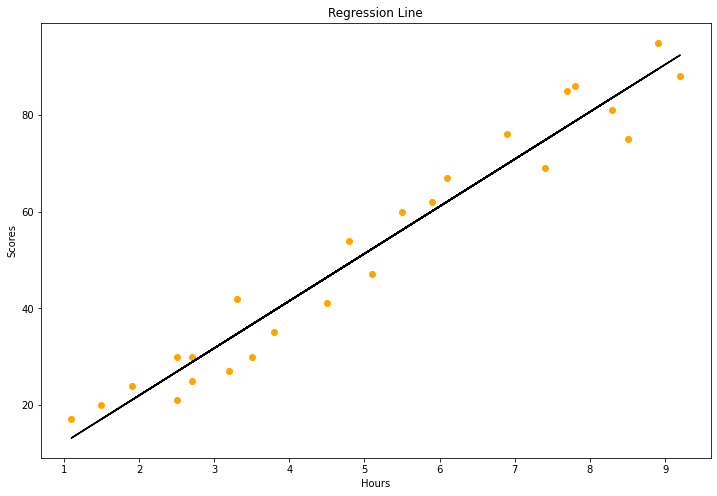

In [22]:
# Plotting the regression line
lr = model.coef_*x+model.intercept_

# Plotting for the test data
plt.figure(figsize = (12,8))
plt.scatter(x, y, color= 'orange')
plt.plot(x, lr, color = 'black', linewidth = 1.5);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Regression Line")
plt.show()

## MAKING PREDICTIONS

In [23]:
print(Xtest) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [24]:
#predicting the scores
y_test = model.predict(Xtest)
print(y_test)

[[17.05366541]
 [33.69422878]
 [74.80620886]
 [26.8422321 ]
 [60.12335883]
 [39.56736879]
 [20.96909209]
 [78.72163554]]


In [25]:
x = pd.DataFrame(Ytest)
y = pd.DataFrame(y_test)
df = pd.concat([x,y], axis = 1, keys=['Actual ', 'predicted'])
df

,Actual,predicted
,0,0
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Solving the problem statement given

In [26]:
hours = [[9.25]]
z = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(z[0]))

No of Hours = [[9.25]]
Predicted Score = [92.91505723]


### Evaluating the model

In [27]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Ytest, y_test)) 

Mean Absolute Error: 4.419727808027652
